<a href="https://colab.research.google.com/github/alinegorischf/Shipment-Price-Prediction/blob/main/Shipment_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset

In this data science project, you will build a machine learning system that will be able to predict the cost of the shipment or package by using machine learning algorithms. This project will be very useful for logistics companies, where on a day-to-day basis a lot of couriers, packages, or goods are transported via different modes of transport. The main concern with these logistics companies is trying to deliver these goods in an efficient and cost-efficient way possible, so the pricing of the shipment is tricky and involves a lot of variables to consider while the pricing of the shipment. There might be scenarios where the shipment might be delayed due to some external reasons, leading to a loss for the company and a delay in delivery of the shipment. So logistics companies need to use dynamic pricing based on several factors and variables to price the shipment in such a way that there are no losses to the company and the price of the shipment is as less as possible so that customers can use their services more due to effective pricing rates.

Problem Statement:

The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.
The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.
Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Import libraries

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [130]:
!git clone https://github.com/alinegorischf/Shipment-Price-Prediction

fatal: destination path 'Shipment-Price-Prediction' already exists and is not an empty directory.


In [131]:
# Display all the dataset
pd.pandas.set_option('display.max_columns', None)

In [132]:
data = '/content/Shipment-Price-Prediction/dataset/SCMS_Delivery_History_Dataset.csv'
read = pd.read_csv(data)
read

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,1138

### Check the data

In [133]:
df = pd.read_csv('/content/Shipment-Price-Prediction/dataset/SCMS_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


#  Data Cleaning

In [134]:
# Verify the data variables and the data type an if there is null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

 * it is indicated the there are total 33 columns, 4 are float columns ,  3 are integer columns and 26 are object columns

In [135]:
# check the columns of dataset
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [136]:
# check the shape of datasets
df.shape

(10324, 33)

In [137]:
# check the missing value

df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

*  it is indicated the three columns are missing value

In [138]:
# check the missing value of percentage

(df.isnull().mean()*100).sort_values(ascending=False)

Dosage                          16.815188
Shipment Mode                    3.487021
Line Item Insurance (USD)        2.779930
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0.000000
Line Item Quantity               0.000000
Line Item Value                  0.000000
Vendor                           0.000000
Pack Price                       0.000000
Unit Price                       0.000000
Manufacturing Site               0.000000
First Line Designation           0.000000
Weight (Kilograms)               0.000000
Freight Cost (USD)               0.000000
Item Description                 0.000000
ID                               0.000000
Project Code                     0.000000
Product Group                    0.000000
Delivery Recorded Date           0.000000
Delivered to Client Date         0.000000
Scheduled Delivery Date          0.000000
PO Sent to Vendor Date           0

In [139]:
# check the total missing value
df.isnull().sum().sum()

2383

In [140]:
# drop the columns
df = df.drop('ID',axis=1)

In [141]:
# check the unique value
df.nunique()

Project Code                     142
PQ #                            1237
PO / SO #                       6233
ASN/DN #                        7030
Country                           43
Managed By                         4
Fulfill Via                        2
Vendor INCO Term                   8
Shipment Mode                      4
PQ First Sent to Client Date     765
PO Sent to Vendor Date           897
Scheduled Delivery Date         2006
Delivered to Client Date        2093
Delivery Recorded Date          2042
Product Group                      5
Sub Classification                 6
Vendor                            73
Item Description                 184
Molecule/Test Type                86
Brand                             48
Dosage                            54
Dosage Form                       17
Unit of Measure (Per Pack)        31
Line Item Quantity              5065
Line Item Value                 8741
Pack Price                      1175
Unit Price                       183
M

In [142]:
# check the unique value in ascending order
df.nunique().sort_values(ascending=False)

Line Item Value                 8741
ASN/DN #                        7030
Freight Cost (USD)              6733
Line Item Insurance (USD)       6722
PO / SO #                       6233
Line Item Quantity              5065
Weight (Kilograms)              4688
Delivered to Client Date        2093
Delivery Recorded Date          2042
Scheduled Delivery Date         2006
PQ #                            1237
Pack Price                      1175
PO Sent to Vendor Date           897
PQ First Sent to Client Date     765
Item Description                 184
Unit Price                       183
Project Code                     142
Manufacturing Site                88
Molecule/Test Type                86
Vendor                            73
Dosage                            54
Brand                             48
Country                           43
Unit of Measure (Per Pack)        31
Dosage Form                       17
Vendor INCO Term                   8
Sub Classification                 6
P

Text(0.5, 1.0, 'Cardinality')

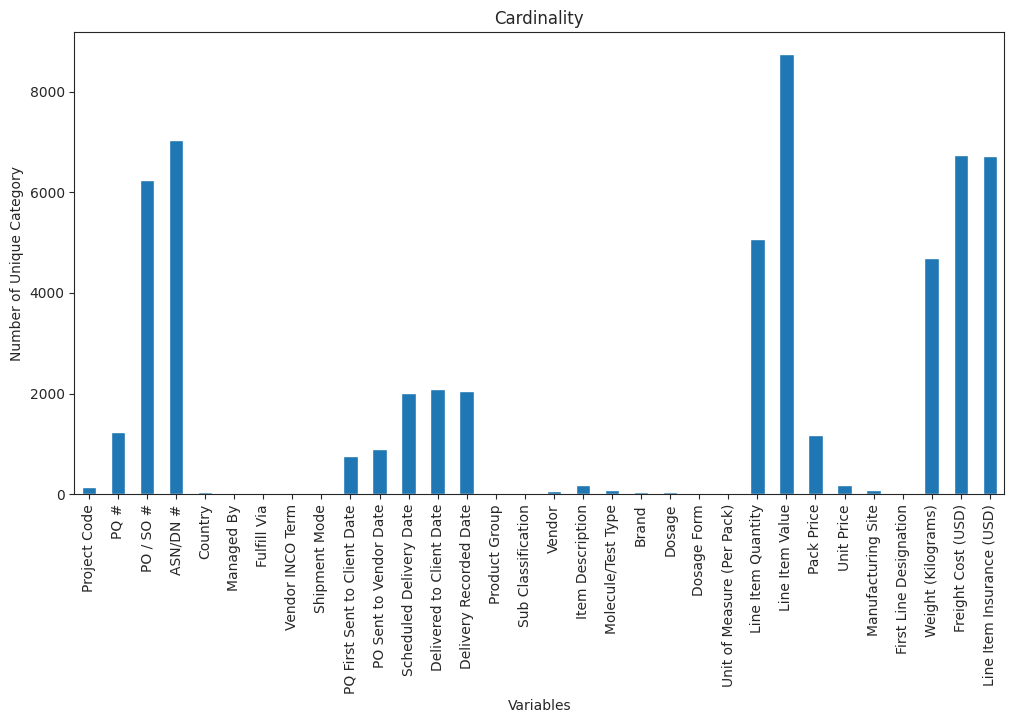

In [143]:
# show the unique value in graph
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of Unique Category')
plt.xlabel('Variables')
plt.title('Cardinality')


In [144]:
# check the duplicated values
df.duplicated().sum()

4

In [145]:
df[df.duplicated]

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
1520,125-HT-T01,Pre-PQ Process,SO-1291,DN-686,Haiti,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,3-Apr-08,3-Apr-08,3-Apr-08,HRDT,HIV test,SCMS from RDC,"HIV 1/2, Determine HIV Kit, without Lancets, 1...","HIV 1/2, Determine HIV Kit, without Lancets",Determine,NaN,Test kit,100,10,720.0,72.00,0.72,Inverness Japan,No,See DN-686 (ID#:10691),See DN-686 (ID#:10691),1.15
2135,100-ZW-T01,Pre-PQ Process,SO-710,DN-488,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,14-Jan-08,14-Jan-08,14-Jan-08,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,1860,23101.2,12.42,0.41,"Cipla, Goa, India",No,See DN-488 (ID#:10652),See DN-488 (ID#:10652),36.96
2577,100-ZW-T01,Pre-PQ Process,SO-716,DN-770,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,9-Jun-08,9-Jun-08,9-Jun-08,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,1860,23101.2,12.42,0.41,"Aurobindo Unit III, India",No,See DN-770 (ID#:10959),See DN-770 (ID#:10959),36.96
5781,105-SS-T30,FPQ-12623,SCMS-200920,ASN-21751,South Sudan,PMO - US,Direct Drop,EXW,Air,7/18/13,8/6/13,18-Oct-13,18-Oct-13,18-Oct-13,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,NaN,Test kit,20,25,800.0,32.00,1.60,"Trinity Biotech, Plc",No,See ASN-21751 (ID#:13968),See ASN-21751 (ID#:13968),0.99


* it is indicated the duplicated value

In [146]:
# drop the duplicated values
df = df.drop_duplicates()

In [147]:
# check the shape of dataset after drop the duplicated value

df.shape

(10320, 32)

In [148]:
# Getting the count of each category from data
for feature in df.columns:
    print(df[feature].value_counts())

116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
100-SN-T01      1
201-UG-T30      1
100-GN-T30      1
A02-SN-T50      1
104-SZ-T30      1
Name: Project Code, Length: 142, dtype: int64
Pre-PQ Process    2678
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-12933            1
FPQ-6823             1
FPQ-15736            1
FPQ-6128             1
FPQ-16523            1
Name: PQ #, Length: 1237, dtype: int64
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: PO / SO #, Length: 6233, dtype: int64
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: ASN/DN #, Length: 7030, dtype: int64
Sou

In [149]:
# print the unique values in each column name
for feature in df.columns:

    print(f"Unique values in  '{feature}' column: {df[feature].unique()}")

Unique values in  'Project Code' column: ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01'
 '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01' '141-NA-T01'
 '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01' '100-SN-T01'
 '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01' '100-ZW-T01'
 '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01' '100-GH-T01'
 '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01' '151-NG-T30'
 '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01' '102-KE-T30'
 '108-VN-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SZ-T30' '114-UG-T30' '105-DO-T30' '113-ZW-T30' '103-CM-T30'
 '109-TZ-T30' '800-CM-T30' '100-BJ-

* it is indicated the Six Columns are some numeric and string  value. Columns name
1. PQ First Sent to Client Date
2.  PO Sent to Vendor Date
3.  Item Description
4.  Dosage	 Columns are null value
5.  Weight (Kilograms)
6.  Freight Cost (USD)
We need a remove unique value
  

# it is indicated the some columns are specifice charcter value. we need a clean it and convert the date time formate.

In [150]:
df['PQ First Sent to Client Date']

0        Pre-PQ Process
1        Pre-PQ Process
2        Pre-PQ Process
3        Pre-PQ Process
4        Pre-PQ Process
              ...      
10319          10/16/14
10320          10/24/14
10321           8/12/14
10322            7/1/15
10323          10/16/14
Name: PQ First Sent to Client Date, Length: 10320, dtype: object

In [151]:
df['PO Sent to Vendor Date']

0        Date Not Captured
1        Date Not Captured
2        Date Not Captured
3        Date Not Captured
4        Date Not Captured
               ...        
10319       N/A - From RDC
10320       N/A - From RDC
10321       N/A - From RDC
10322       N/A - From RDC
10323       N/A - From RDC
Name: PO Sent to Vendor Date, Length: 10320, dtype: object

In [152]:
# converting dates into datetimes formate

date_time = ['PQ First Sent to Client Date','PO Sent to Vendor Date','Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']

for columns in date_time:
  df[columns] = pd.to_datetime(df[columns],errors='coerce')

 *  We are convert the 5 columns are date and time formate

In [153]:
# Replace NAN with mode in Dosage column
df['Dosage']

0                  NaN
1              10mg/ml
2                  NaN
3                150mg
4                 30mg
             ...      
10319       30/50/60mg
10320        150/300mg
10321    600/300/300mg
10322        150/300mg
10323          30/60mg
Name: Dosage, Length: 10320, dtype: object

In [154]:
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])

In [155]:
df['Weight (Kilograms)']

0                                13
1                               358
2                               171
3                              1855
4                              7590
                    ...            
10319       See DN-4307 (ID#:83920)
10320       See DN-4313 (ID#:83921)
10321    Weight Captured Separately
10322                          1392
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 10320, dtype: object

In [156]:
 # Tackling Weight (Kilograms) missing values and convert the numeric data
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].replace('Weight Captured Separately',0)

df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors = 'coerce')

# filling the missing value with mean
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].mean())

In [157]:
df['Freight Cost (USD)']

0                                    780.34
1                                    4521.5
2                                   1653.78
3                                  16007.06
4                                  45450.08
                        ...                
10319               See DN-4307 (ID#:83920)
10320               See DN-4313 (ID#:83921)
10321    Freight Included in Commodity Cost
10322    Freight Included in Commodity Cost
10323    Freight Included in Commodity Cost
Name: Freight Cost (USD), Length: 10320, dtype: object

In [158]:
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors = 'coerce')

# filling the missing value with the help of mean()
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(df['Freight Cost (USD)'].mean())

In [159]:
df['Line Item Insurance (USD)']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
10319     705.79
10320     161.71
10321    5284.04
10322     134.03
10323      85.82
Name: Line Item Insurance (USD), Length: 10320, dtype: float64

In [160]:
# remove rows with NaN values
df.dropna(subset=['Line Item Insurance (USD)'], inplace=True)

# convert column to float type
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].astype(float)

print(df)

      Project Code            PQ # PO / SO # ASN/DN #        Country  \
16      102-NG-T01  Pre-PQ Process  SCMS-354  ASN-608        Nigeria   
19      102-NG-T01  Pre-PQ Process  SCMS-592  ASN-485        Nigeria   
21      104-CI-T01  Pre-PQ Process  SCMS-698  ASN-727  Côte d'Ivoire   
22      108-VN-T01  Pre-PQ Process  SCMS-753  ASN-781        Vietnam   
23      108-VN-T01  Pre-PQ Process  SCMS-759  ASN-632        Vietnam   
...            ...             ...       ...      ...            ...   
10319   103-ZW-T30       FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320   104-CI-T30       FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321   110-ZM-T30       FPQ-14784  SO-49600  DN-4316         Zambia   
10322   200-ZW-T30       FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323   103-ZW-T30       FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
16      PMO - US  Direct Drop              CIP           NaN   
19     

Exploratory Data Analysis (EDA)

In [161]:
# it is indicate the data type of columns
df.dtypes

Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage                                  object
Dosage Form  

In [162]:
# drop the columns

df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis = 1)

In [163]:
# after cleaning the data we are again analysis data


df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
16,102-NG-T01,Nigeria,PMO - US,Direct Drop,CIP,NaN,NaT,NaT,2007-05-07,2007-05-07,2007-05-07,HRDT,HIV test,ACCOUN NIGERIA LIMITED,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1500,120000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,0.0,11103.234819,192.00
19,102-NG-T01,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,2007-05-13,2007-06-19,2007-06-19,2007-06-19,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341.0,2682.470000,128.00
21,104-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,NaT,2007-07-13,2007-10-02,2007-10-02,2007-10-02,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx,200mg,Tablet,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126.0,11103.234819,224.93
22,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2007-07-04,2007-10-15,2007-10-15,2007-10-15,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941.0,4193.490000,3.07
23,108-VN-T01,Vietnam,PMO - US,Direct Drop,FCA,Air,NaT,2007-07-04,2007-08-27,2007-08-27,2007-08-27,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117.0,1767.380000,65.75


In [164]:
df.isnull().sum()

Project Code                       0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    254
PQ First Sent to Client Date    2391
PO Sent to Vendor Date          5482
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                             0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
F

In [165]:
df.shape

(10033, 29)

In [166]:
df.columns

Index(['Project Code', 'Country', 'Managed By', 'Fulfill Via',
       'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'Scheduled Delivery Date',
       'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group',
       'Sub Classification', 'Vendor', 'Item Description',
       'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form',
       'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value',
       'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

# Segregrate the data in NUmerical and Categorical Columns

In [167]:
num_columns = [feature for feature in df.columns if df[feature].dtypes=='Object']
print(" Numerical columns :", len(num_columns))
print((num_columns))

 Numerical columns : 0
[]


In [168]:
float_columns = [feature for feature in df.columns if df[feature].dtypes=='float64']
print("Number of  coloumns :" , len(float_columns))
print((float_columns))

Number of  coloumns : 6
['Line Item Value', 'Pack Price', 'Unit Price', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


In [169]:
cat_columns = [feature for feature in df.columns if df[feature].dtype!='Object']
print("Number of Columns: " , len(cat_columns))
print(cat_columns)

Number of Columns:  29
['Project Code', 'Country', 'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode', 'PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date', 'Product Group', 'Sub Classification', 'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']


In [170]:
df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
16,102-NG-T01,Nigeria,PMO - US,Direct Drop,CIP,NaN,NaT,NaT,2007-05-07,2007-05-07,2007-05-07,HRDT,HIV test,ACCOUN NIGERIA LIMITED,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1500,120000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,0.0,11103.234819,192.00
19,102-NG-T01,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,2007-05-13,2007-06-19,2007-06-19,2007-06-19,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341.0,2682.470000,128.00
21,104-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,NaT,2007-07-13,2007-10-02,2007-10-02,2007-10-02,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx,200mg,Tablet,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126.0,11103.234819,224.93
22,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2007-07-04,2007-10-15,2007-10-15,2007-10-15,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941.0,4193.490000,3.07
23,108-VN-T01,Vietnam,PMO - US,Direct Drop,FCA,Air,NaT,2007-07-04,2007-08-27,2007-08-27,2007-08-27,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117.0,1767.380000,65.75


In [171]:
import seaborn as sns



<Axes: >

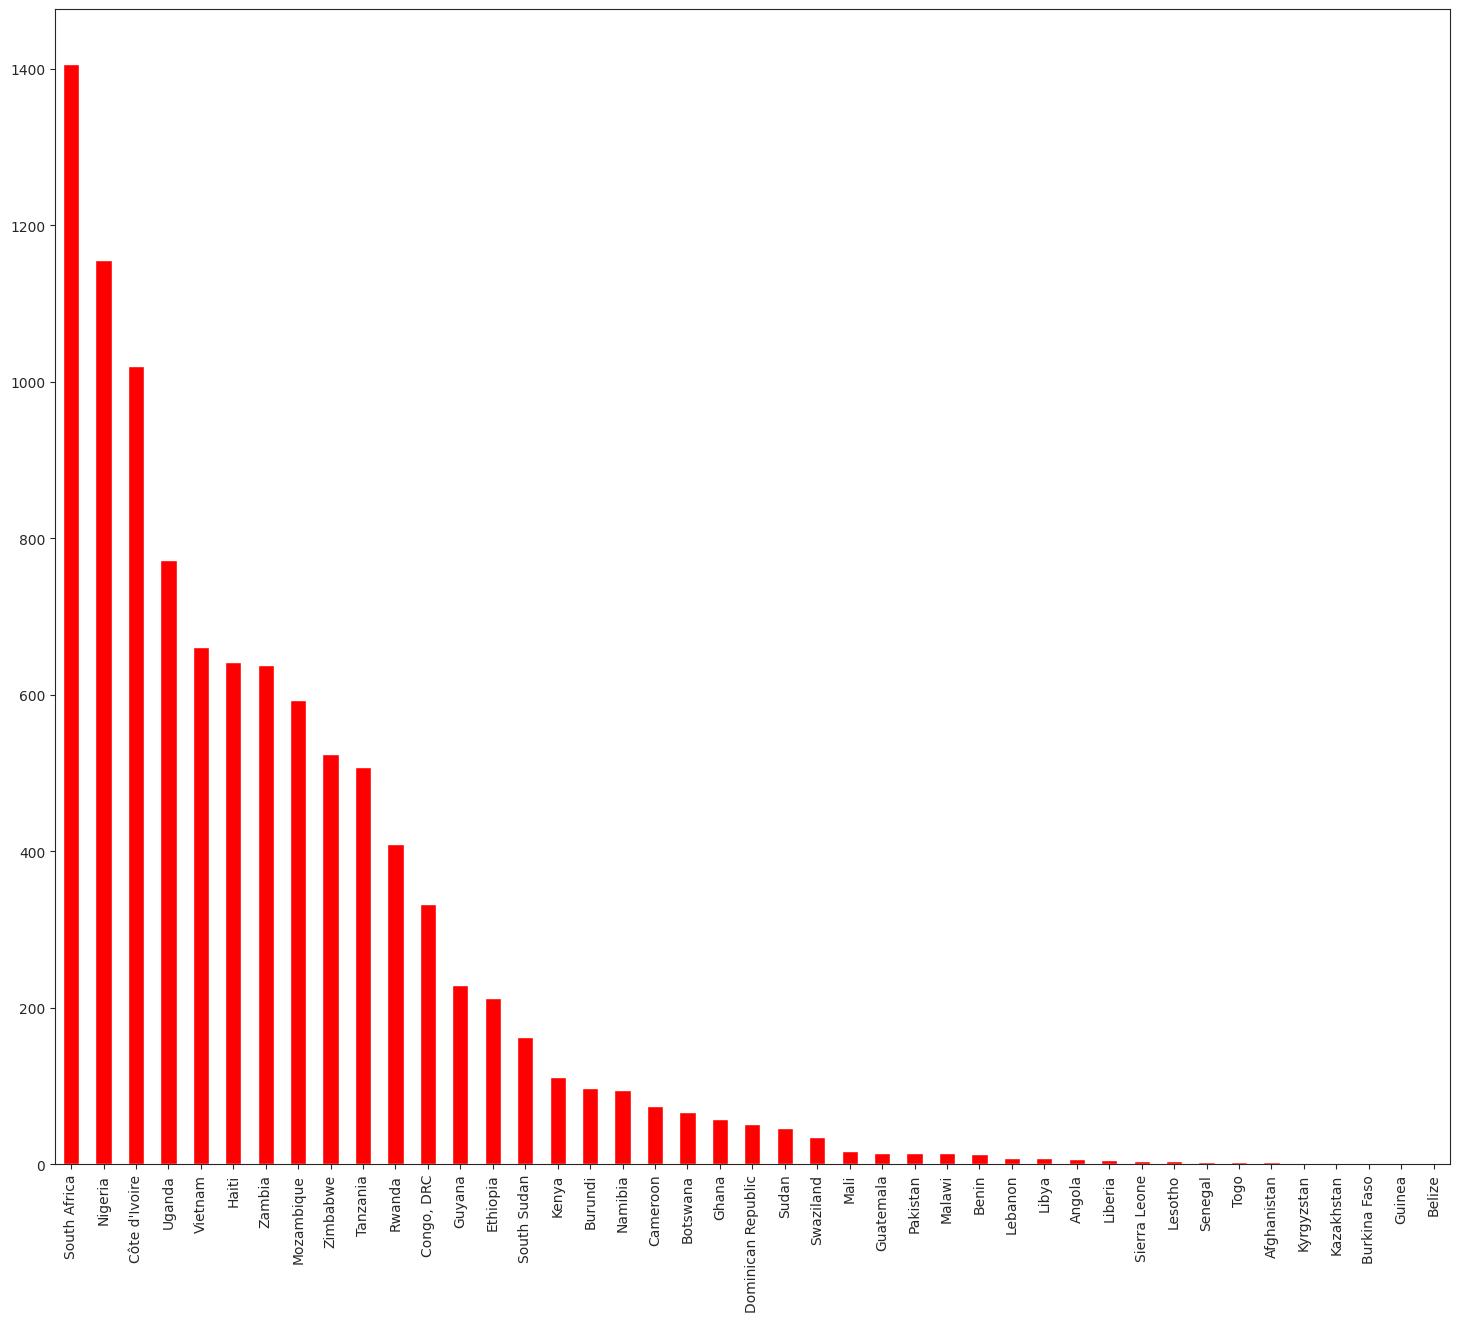

In [172]:
# top 10 country
plt.figure(figsize=(18,15))
df['Country'].value_counts().plot(kind="bar", color='red')


In [173]:
df['Shipment Mode'].value_counts()

Air            5928
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

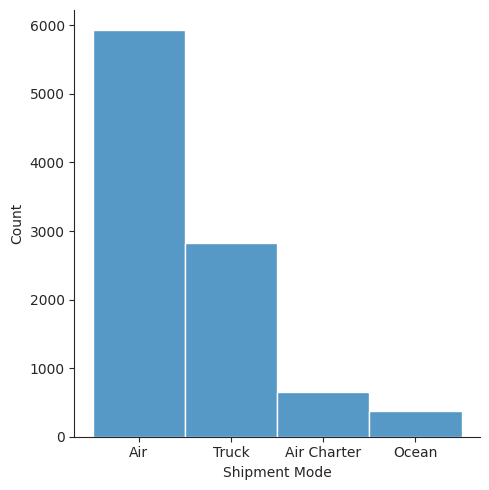

In [174]:
sns.displot(df['Shipment Mode'])

* it is indicate  the by Air Shipment MOde is too much demand

#  find out the top 10 brand

In [175]:

top10 = df['Brand'].value_counts().sort_values(ascending=False).head(10)
top10

Generic      7135
Determine     775
Uni-Gold      359
Aluvia        242
Kaletra       161
Norvir        135
Stat-Pak      108
Bioline       107
Truvada        92
Videx          78
Name: Brand, dtype: int64

<Axes: >

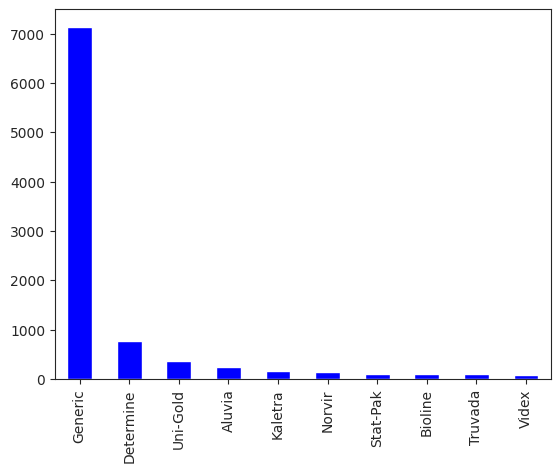

In [176]:
top10.plot(kind='bar', color ='blue')

# find out the how many product group category

In [177]:
df['Product Group'].value_counts()

ARV     8339
HRDT    1648
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

In [178]:
# check the Item Description name
df['Item Description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                726
Nevirapine 200mg, tablets, 60 Tabs                                               614
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 578
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                576
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   554
                                                                                ... 
HIV 1/2, ImmunoComb II BiSpot EIA Kit, 36 Tests                                    1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests                                        1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: Item Description, Length: 182, dtype: int64

In [179]:
# finf out top 10 unit price
df['Unit Price'].value_counts().sort_values(ascending=False).head(10)


0.04    708
0.01    482
0.12    450
0.14    439
0.11    396
0.80    385
1.60    358
0.05    340
0.16    340
0.19    319
Name: Unit Price, dtype: int64

# find out top 10 brand and unit price

In [180]:
df.groupby('Brand')['Pack Price'].sum()

Brand
Aluvia             10386.54
Atripla              806.40
Bioline             2206.32
Bundi                 75.00
Capillus            3687.69
CareStart             23.40
Clearview           1505.00
Coartem              500.63
Colloidal Gold      1686.00
Combivir              71.61
Crixivan            1549.32
Determine          57434.56
DoubleCheck          267.56
Epivir               284.41
First Response       217.90
Generic            59774.17
Genie               2225.71
Hexagon              334.74
INSTi                 94.01
ImmunoComb           295.00
InstantCHEK           75.00
Intelence           1358.02
Invirase            4135.41
Isentress           2945.38
Kaletra             5460.78
LAV                 1674.80
Multispot           6323.23
Norvir              4712.31
OraQuick           15015.25
Paramax              187.50
Pepti-LAV            238.65
Prezista            2769.12
Retrovir             564.39
Reveal                51.00
Reyataz              729.93
Stat-Pak      

# find out top 10 Manufacturing Site

In [181]:
manu_fact = df['Manufacturing Site'].value_counts().sort_values(ascending=False).head(10)
manu_fact

Aurobindo Unit III, India         3070
Mylan (formerly Matrix) Nashik    1415
Hetero Unit III Hyderabad IN       869
Cipla, Goa, India                  644
Strides, Bangalore, India.         534
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               385
ABBVIE Ludwigshafen Germany        361
Inverness Japan                    344
ABBVIE (Abbott) Logis. UK          216
Name: Manufacturing Site, dtype: int64

<Axes: >

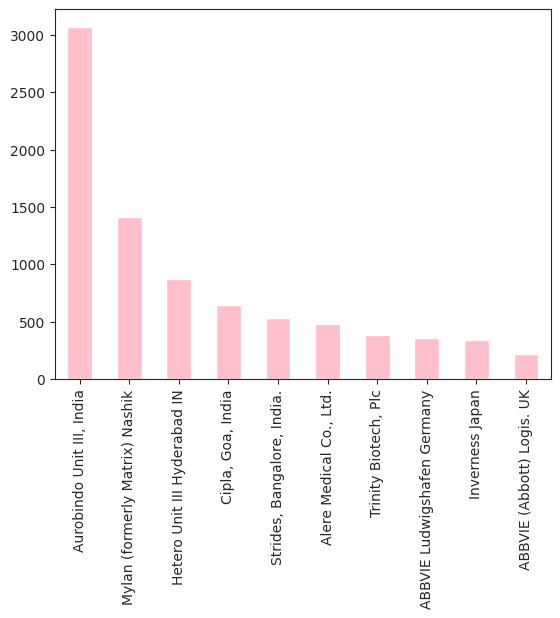

In [182]:
manu_fact.plot(kind='bar', color='pink' )

In [183]:
# find out top 10 brand and company name , where is Manufacturing site




In [184]:
df.groupby('Country')

<Axes: xlabel='Country'>

<Figure size 1800x1500 with 0 Axes>

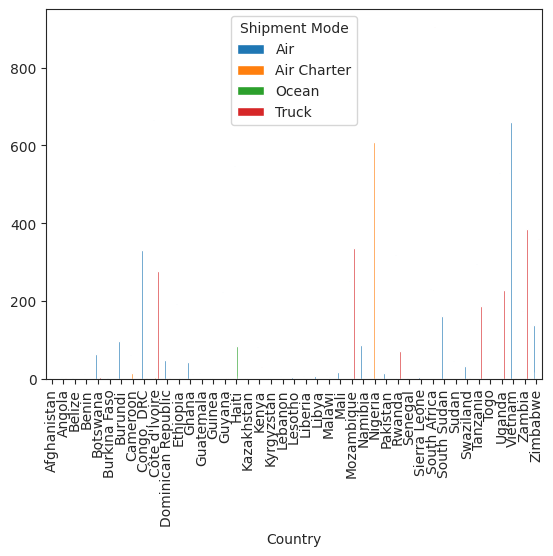

In [185]:
# check the Country and Shipment Mode
plt.figure(figsize=(18,15))
resume=pd.crosstab(df['Country'],df['Shipment Mode'])
resume.plot(kind='bar')

In [186]:
# check the Product Group item
df['Product Group'].value_counts()

ARV     8339
HRDT    1648
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

## Find out top 25 Country, which Manufacturing Site is situated ?

In [187]:

df.groupby(['Country'])['Manufacturing Site'].value_counts().sort_values(ascending=False).head(25)

Country        Manufacturing Site            
South Africa   Aurobindo Unit III, India         703
Nigeria        Aurobindo Unit III, India         408
Côte d'Ivoire  Aurobindo Unit III, India         353
Haiti          Aurobindo Unit III, India         262
Nigeria        Mylan (formerly Matrix) Nashik    211
Uganda         Aurobindo Unit III, India         203
Côte d'Ivoire  Mylan (formerly Matrix) Nashik    171
Zambia         Aurobindo Unit III, India         169
Vietnam        Mylan (formerly Matrix) Nashik    161
Uganda         Mylan (formerly Matrix) Nashik    158
Vietnam        Aurobindo Unit III, India         151
               Hetero Unit III Hyderabad IN      146
Mozambique     Aurobindo Unit III, India         140
Tanzania       Aurobindo Unit III, India         127
Zimbabwe       Cipla, Goa, India                 124
Zambia         Mylan (formerly Matrix) Nashik    122
South Africa   Cipla, Goa, India                 121
Tanzania       Mylan (formerly Matrix) Nashik    105


# check the  realtion ship between Vendor and Item Description

In [188]:
df.groupby(['Vendor'])['Item Description'].value_counts().sort_values(ascending=False).head(10)

Vendor                Item Description                                                    
Orgenics, Ltd         HIV 1/2, Determine Complete HIV Kit, 100 Tests                          505
SCMS from RDC         Efavirenz 600mg, tablets, 30 Tabs                                       482
                      Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs        473
                      Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                       454
                      Nevirapine 200mg, tablets, 60 Tabs                                      445
Trinity Biotech, Plc  HIV 1/2, Uni-Gold HIV Kit, 20 Tests                                     321
SCMS from RDC         Lamivudine/Tenofovir Disoproxil Fumarate 300/300mg, tablets, 30 Tabs    238
                      Lamivudine 150mg, tablets, 60 Tabs                                      213
                      Lamivudine/Nevirapine/Stavudine 150/200/30mg, tablets, 60 Tabs          204
                      Zidov

<Axes: >

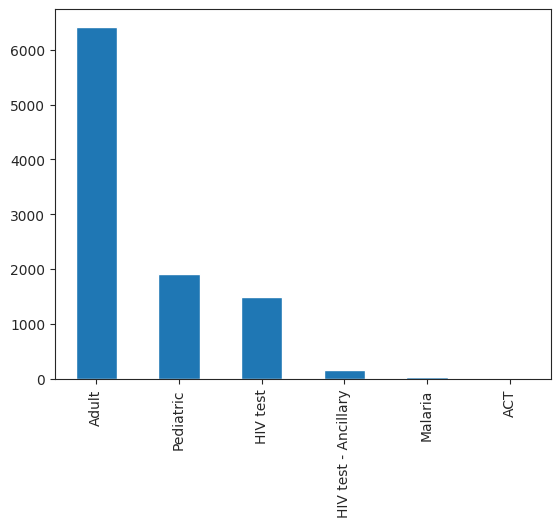

In [189]:
df["Sub Classification"].value_counts().plot(kind='bar')

In [190]:
df['Fulfill Via'].value_counts()

From RDC       5232
Direct Drop    4801
Name: Fulfill Via, dtype: int64

# Check the percentage of bussine occupaid by country wise

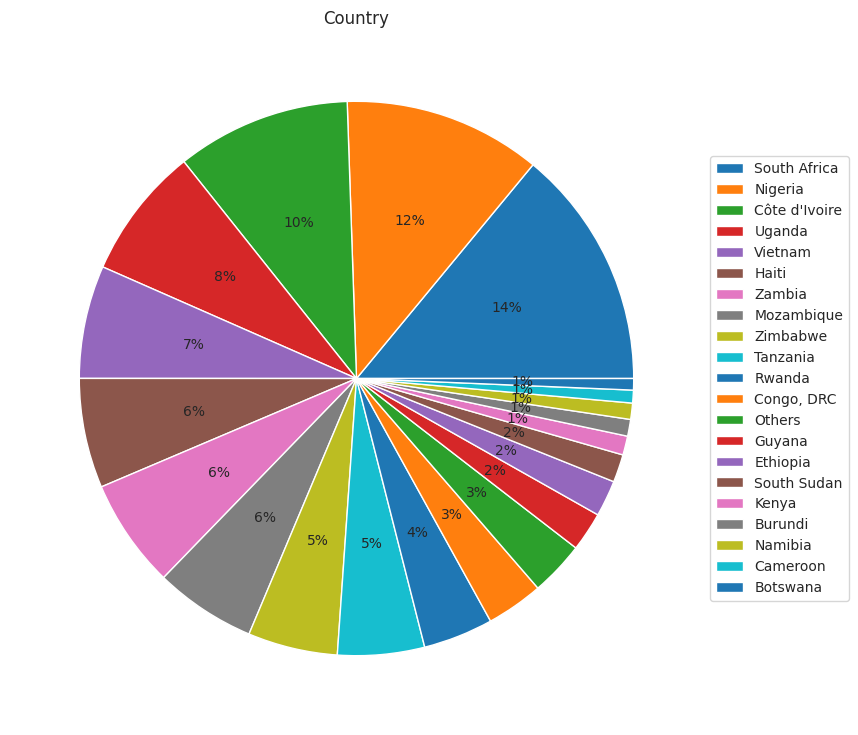

In [191]:
counts = df['Country'].value_counts()
idx = counts[counts.lt(60)].index
df.loc[df['Country'].isin(idx), 'Country'] = 'Others'
df["Country"].value_counts().plot.pie(label='',title="Country",legend=True,figsize=(9,9),autopct='%1.0f%%',labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [192]:
df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
16,102-NG-T01,Nigeria,PMO - US,Direct Drop,CIP,NaN,NaT,NaT,2007-05-07,2007-05-07,2007-05-07,HRDT,HIV test,ACCOUN NIGERIA LIMITED,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1500,120000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,0.0,11103.234819,192.00
19,102-NG-T01,Nigeria,PMO - US,Direct Drop,EXW,Air,NaT,2007-05-13,2007-06-19,2007-06-19,2007-06-19,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,100,1000,80000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,341.0,2682.470000,128.00
21,104-CI-T01,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,NaT,2007-07-13,2007-10-02,2007-10-02,2007-10-02,ARV,Pediatric,BRISTOL-MYERS SQUIBB,"#102198**Didanosine 200mg [Videx], tablets, 60...",Didanosine,Videx,200mg,Tablet,60,5513,140581.5,25.50,0.42,"BMS Meymac, France",Yes,2126.0,11103.234819,224.93
22,108-VN-T01,Vietnam,PMO - US,Direct Drop,EXW,Air,NaT,2007-07-04,2007-10-15,2007-10-15,2007-10-15,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,1920.0,1.92,0.01,"Aurobindo Unit III, India",Yes,941.0,4193.490000,3.07
23,108-VN-T01,Vietnam,PMO - US,Direct Drop,FCA,Air,NaT,2007-07-04,2007-08-27,2007-08-27,2007-08-27,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,200/50mg,Tablet,120,500,41095.0,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117.0,1767.380000,65.75


# Find out heighest price of Shipment Mode

In [193]:
df.groupby('Shipment Mode')['Freight Cost (USD)'].sum()

Shipment Mode
Air            6.359307e+07
Air Charter    1.143544e+07
Ocean          4.578917e+06
Truck          3.034147e+07
Name: Freight Cost (USD), dtype: float64

* it is indiacted the Heighest Price of Shipment Mode in Air  6.359307e+07

# Find out the lowest price of shipment mode

In [194]:
df.groupby('Shipment Mode')['Freight Cost (USD)'].min()

Shipment Mode
Air              0.75
Air Charter    134.00
Ocean          146.50
Truck           22.29
Name: Freight Cost (USD), dtype: float64

## Find the total number of barnd

In [195]:
len(df.groupby('Brand'))

47

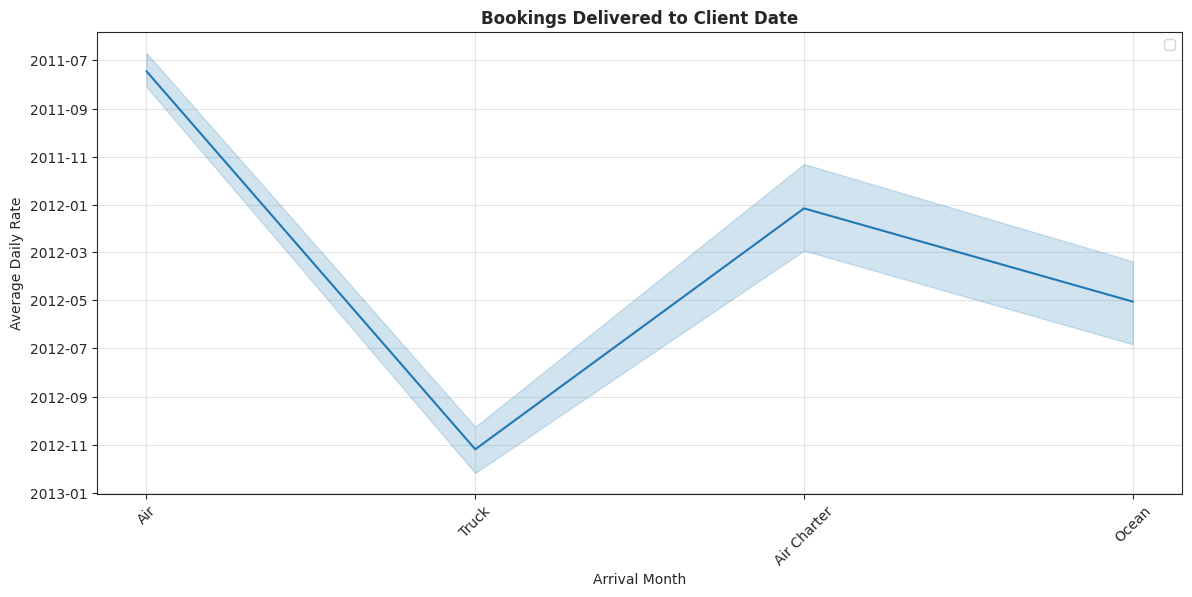

In [196]:
# Arrange the month for plotting Delivered to Client Date

df['Delivered to Client Date']=pd.Categorical(df['Delivered to Client Date'], ordered=True)

#plot line chart
plt.figure(figsize=(14,6))
sns.set_style('ticks')
sns.lineplot(x='Shipment Mode',y='Delivered to Client Date', data=df)
plt.title('Bookings Delivered to Client Date' , weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.grid(alpha=0.5)

In [197]:
# Check Total freight Cost (USD)
total_freight_cost = df['Freight Cost (USD)'].sum()
total_freight_cost

112353922.2273072

# it is indicated the top Country by total expence

In [198]:
country_summary = df.groupby('Country').sum().reset_index()
country_summary

,Country,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,Botswana,3619,118902,1.596899e+06,6540.54,257.81,3.066091e+04,2.238884e+05,2105.44
1,Burundi,8031,203212,3.351580e+06,2051.81,55.47,1.311839e+05,7.783782e+05,4012.37
2,Cameroon,4342,1790405,1.462917e+07,3864.62,55.66,2.486705e+05,2.003313e+06,18707.34
3,"Congo, DRC",30445,518546,5.772336e+06,6032.41,171.91,6.681158e+05,3.241724e+06,6704.27
4,Côte d'Ivoire,91487,11637154,1.174490e+08,20256.87,615.41,2.384526e+06,9.738285e+06,182381.08
5,Ethiopia,13628,2554695,1.872480e+07,3418.42,836.97,4.321305e+05,2.444096e+06,33112.59
6,Guyana,23496,182767,4.134950e+06,5306.95,101.17,2.346828e+05,1.384353e+06,6828.27
7,Haiti,66550,5223263,4.323458e+07,16700.30,550.18,1.160608e+06,6.826143e+06,59443.99
8,Kenya,8249,570631,3.393156e+07,6349.14,128.40,1.927046e+05,1.651076e+06,60272.65
9,Mozambique,45102,19073498,1.787870e+08,12896.17,246.86,2.941291e+06,5.982037e+06,244973.02


# We are compare the Country wise Freight Cost (USD) price

In [199]:

country_summary = country_summary[['Country','Freight Cost (USD)']]
country_summary

,Country,Freight Cost (USD)
0,Botswana,2.238884e+05
1,Burundi,7.783782e+05
2,Cameroon,2.003313e+06
3,"Congo, DRC",3.241724e+06
4,Côte d'Ivoire,9.738285e+06
5,Ethiopia,2.444096e+06
6,Guyana,1.384353e+06
7,Haiti,6.826143e+06
8,Kenya,1.651076e+06
9,Mozambique,5.982037e+06


# We are compare Country wise , Shipment Mode and Freight Cost (USD) in list

In [200]:
country_summary = df.groupby(['Country', 'Shipment Mode']).sum().reset_index()
country_summary

,Country,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,Botswana,Air,3299,117497,1.546999e+06,5736.54,248.49,2.342900e+04,1.893580e+05,2024.34
1,Botswana,Truck,320,1405,4.990000e+04,804.00,9.32,7.231911e+03,3.453043e+04,81.10
2,Burundi,Air,8031,203212,3.351580e+06,2051.81,55.47,1.311839e+05,7.783782e+05,4012.37
3,Cameroon,Air,3742,1201005,1.064419e+07,3775.48,53.31,1.512044e+05,1.546904e+06,13334.80
4,Cameroon,Air Charter,600,589400,3.984977e+06,89.14,2.35,9.746610e+04,4.564088e+05,5372.54
5,"Congo, DRC",Air,30344,513546,5.465586e+06,5909.71,163.25,6.681158e+05,3.219517e+06,6388.93
6,"Congo, DRC",Truck,101,5000,3.067500e+05,122.70,8.66,0.000000e+00,2.220647e+04,315.34
7,Côte d'Ivoire,Air,64396,5057167,6.109787e+07,15189.66,282.92,1.259278e+06,5.772273e+06,105829.98
8,Côte d'Ivoire,Air Charter,240,79898,7.662445e+05,78.74,1.85,1.014946e+04,4.255951e+04,1237.80
9,Côte d'Ivoire,Ocean,600,68973,2.107216e+06,153.28,1.29,1.126600e+04,1.274085e+05,3308.76


In [201]:
country_summary = country_summary[['Country','Shipment Mode', 'Freight Cost (USD)']]
country_summary

,Country,Shipment Mode,Freight Cost (USD)
0,Botswana,Air,1.893580e+05
1,Botswana,Truck,3.453043e+04
2,Burundi,Air,7.783782e+05
3,Cameroon,Air,1.546904e+06
4,Cameroon,Air Charter,4.564088e+05
5,"Congo, DRC",Air,3.219517e+06
6,"Congo, DRC",Truck,2.220647e+04
7,Côte d'Ivoire,Air,5.772273e+06
8,Côte d'Ivoire,Air Charter,4.255951e+04
9,Côte d'Ivoire,Ocean,1.274085e+05


## Statistical Analysis

In [202]:
# check the summary of statistical
df.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10033.000000,10033.000000,1.003300e+04,10033.000000,10033.000000,10033.000000,10033.000000,10033.000000
mean,77.686833,18663.471046,1.596869e+05,21.258315,0.611349,2671.592257,11198.437379,240.205776
std,76.650711,40482.366445,3.490771e+05,44.459721,3.320426,5672.613103,12344.983985,500.270659
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,30.000000,407.000000,4.267000e+03,4.120000,0.070000,100.000000,4454.620000,6.510000
50%,60.000000,3056.000000,3.044840e+04,8.820000,0.160000,1454.000000,11103.234819,47.110000
75%,90.000000,17600.000000,1.687635e+05,23.000000,0.450000,2769.455515,11103.234819,252.400000
max,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,154780.000000,289653.200000,7708.440000


In [203]:
# check the transpose value
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit of Measure (Per Pack),10033.0,77.686833,76.650711,1.00,30.00,60.000000,90.000000,1000.00
Line Item Quantity,10033.0,18663.471046,40482.366445,1.00,407.00,3056.000000,17600.000000,619999.00
Line Item Value,10033.0,159686.941312,349077.069994,0.00,4267.00,30448.400000,168763.540000,5951990.40
Pack Price,10033.0,21.258315,44.459721,0.00,4.12,8.820000,23.000000,1345.64
Unit Price,10033.0,0.611349,3.320426,0.00,0.07,0.160000,0.450000,238.65
Weight (Kilograms),10033.0,2671.592257,5672.613103,0.00,100.00,1454.000000,2769.455515,154780.00
Freight Cost (USD),10033.0,11198.437379,12344.983985,0.75,4454.62,11103.234819,11103.234819,289653.20
Line Item Insurance (USD),10033.0,240.205776,500.270659,0.00,6.51,47.110000,252.400000,7708.44


In [204]:
# check the correlation
df.corr()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
Unit of Measure (Per Pack),1.000000,-0.150273,-0.127548,0.092973,-0.103052,-0.071029,-0.043027,-0.131912
Line Item Quantity,-0.150273,1.000000,0.839380,-0.131729,-0.051906,0.606994,0.311752,0.798646
Line Item Value,-0.127548,0.839380,1.000000,-0.014006,-0.019387,0.598238,0.358078,0.961350
Pack Price,0.092973,-0.131729,-0.014006,1.000000,0.251254,-0.097732,-0.006715,-0.015350
Unit Price,-0.103052,-0.051906,-0.019387,0.251254,1.000000,-0.023980,0.080606,-0.021423
Weight (Kilograms),-0.071029,0.606994,0.598238,-0.097732,-0.023980,1.000000,0.450246,0.557945
Freight Cost (USD),-0.043027,0.311752,0.358078,-0.006715,0.080606,0.450246,1.000000,0.324064
Line Item Insurance (USD),-0.131912,0.798646,0.961350,-0.015350,-0.021423,0.557945,0.324064,1.000000


In [205]:
# check the skewness
df.skew()

Unit of Measure (Per Pack)     4.377980
Line Item Quantity             4.988691
Line Item Value                5.790676
Pack Price                    13.916055
Unit Price                    40.100685
Weight (Kilograms)             8.720364
Freight Cost (USD)             6.051483
Line Item Insurance (USD)      4.826275
dtype: float64

In [206]:
# check the quantile value
df.quantile()


Unit of Measure (Per Pack)       60.000000
Line Item Quantity             3056.000000
Line Item Value               30448.400000
Pack Price                        8.820000
Unit Price                        0.160000
Weight (Kilograms)             1454.000000
Freight Cost (USD)            11103.234819
Line Item Insurance (USD)        47.110000
Name: 0.5, dtype: float64

In [207]:
# check the  covarrience

df.cov()

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
Unit of Measure (Per Pack),5.875332e+03,-4.662964e+05,-3.412804e+06,316.841230,-26.228153,-3.088431e+04,-4.071472e+04,-5.058314e+03
Line Item Quantity,-4.662964e+05,1.638822e+09,1.186167e+10,-237090.582886,-6977.151369,1.393905e+08,1.557995e+08,1.617429e+07
Line Item Value,-3.412804e+06,1.186167e+10,1.218548e+11,-217377.600310,-22470.848775,1.184618e+09,1.543084e+09,1.678834e+08
Pack Price,3.168412e+02,-2.370906e+05,-2.173776e+05,1976.666782,37.091369,-2.464832e+04,-3.685608e+03,-3.414172e+02
Unit Price,-2.622815e+01,-6.977151e+03,-2.247085e+04,37.091369,11.025229,-4.516708e+02,3.304089e+03,-3.558562e+01
Weight (Kilograms),-3.088431e+04,1.393905e+08,1.184618e+09,-24648.324902,-451.670765,3.217854e+07,3.152997e+07,1.583359e+06
Freight Cost (USD),-4.071472e+04,1.557995e+08,1.543084e+09,-3685.608148,3304.088604,3.152997e+07,1.523986e+08,2.001367e+06
Line Item Insurance (USD),-5.058314e+03,1.617429e+07,1.678834e+08,-341.417215,-35.585619,1.583359e+06,2.001367e+06,2.502707e+05


## Heatmap

<Axes: >

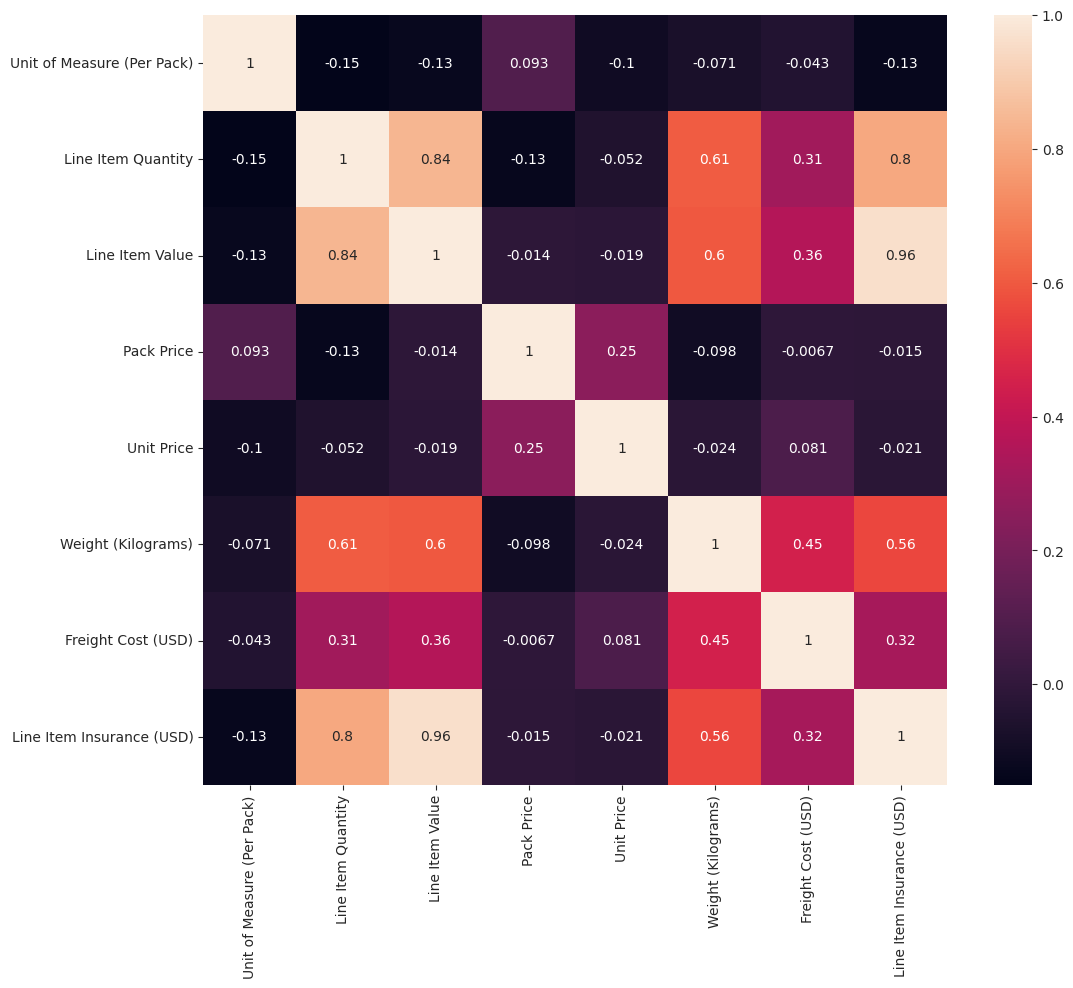

In [208]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)

In [209]:
# check the Standard Deviation
df.std()

PQ First Sent to Client Date    618 days 05:04:00.432302272
PO Sent to Vendor Date          833 days 21:11:21.117641600
Scheduled Delivery Date         866 days 09:01:07.647410512
Delivery Recorded Date          870 days 18:28:03.287990336
Unit of Measure (Per Pack)                        76.650711
Line Item Quantity                             40482.366445
Line Item Value                               349077.069994
Pack Price                                        44.459721
Unit Price                                         3.320426
Weight (Kilograms)                              5672.613103
Freight Cost (USD)                             12344.983985
Line Item Insurance (USD)                        500.270659
dtype: object

In [210]:
# check the minimum number
df.min()

Project Code                                                           100-BJ-T30
Country                                                                  Botswana
Managed By                                                  Ethiopia Field Office
Fulfill Via                                                           Direct Drop
Vendor INCO Term                                                              CIF
PQ First Sent to Client Date                                  2009-01-04 00:00:00
PO Sent to Vendor Date                                        2007-02-07 00:00:00
Scheduled Delivery Date                                       2007-05-07 00:00:00
Delivered to Client Date                                      2007-01-24 00:00:00
Delivery Recorded Date                                        2007-05-07 00:00:00
Product Group                                                                 ACT
Sub Classification                                                            ACT
Vendor          

In [211]:
# check the maximum number
df.max()

Project Code                                            A02-SN-T50
Country                                                   Zimbabwe
Managed By                               South Africa Field Office
Fulfill Via                                               From RDC
Vendor INCO Term                                    N/A - From RDC
PQ First Sent to Client Date                   2015-07-07 00:00:00
PO Sent to Vendor Date                         2015-08-24 00:00:00
Scheduled Delivery Date                        2015-12-31 00:00:00
Delivered to Client Date                       2015-09-14 00:00:00
Delivery Recorded Date                         2015-09-14 00:00:00
Product Group                                                 MRDT
Sub Classification                                       Pediatric
Vendor                                          ZEPHYR BIOMEDICALS
Item Description                Zidovudine 300mg, tablets, 60 Tabs
Molecule/Test Type                                      Zidovu

In [212]:
# check the mean()
df.mean()


Unit of Measure (Per Pack)        77.686833
Line Item Quantity             18663.471046
Line Item Value               159686.941312
Pack Price                        21.258315
Unit Price                         0.611349
Weight (Kilograms)              2671.592257
Freight Cost (USD)             11198.437379
Line Item Insurance (USD)        240.205776
dtype: float64

In [213]:
# df.median()
df.median()

Unit of Measure (Per Pack)       60.000000
Line Item Quantity             3056.000000
Line Item Value               30448.400000
Pack Price                        8.820000
Unit Price                        0.160000
Weight (Kilograms)             1454.000000
Freight Cost (USD)            11103.234819
Line Item Insurance (USD)        47.110000
dtype: float64

## Box Plot

<Axes: >

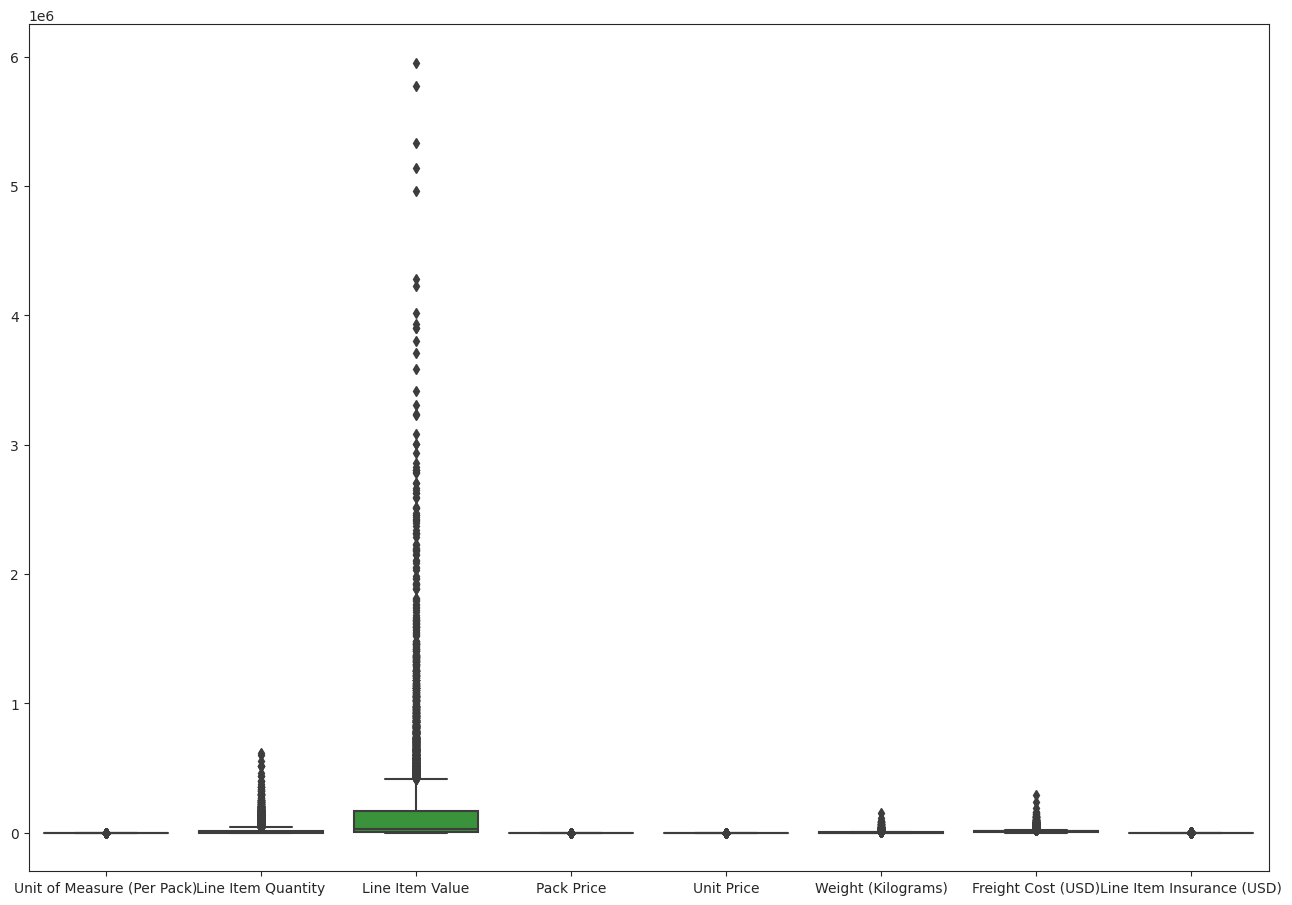

In [214]:
plt.figure(figsize=(16,11))
sns.boxplot(data=df , orient = "v")

* it is indicated the outliers in Line Item Quantity , Line Item Value , Weight(kilograme) , Freight Cost (USD)

## Handle outliers